In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
dataset = pd.read_csv('Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)

In [3]:
dataset.head()


,Open,High,Low,Close,Volume
Date,,,,,
2014-03-27,566.44,566.44,551.41,556.93,"13,100"
2014-03-28,559.66,564.88,557.14,558.46,"41,200"
2014-03-31,565.34,565.45,555.41,555.45,"10,800"
2014-04-01,557.18,566.89,557.18,565.61,"7,900"
2014-04-02,598.35,603.17,560.65,565.45,"147,100"


In [4]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 698 entries, 2014-03-27 to 2016-12-30
Data columns (total 5 columns):
Open      698 non-null float64
High      698 non-null float64
Low       698 non-null float64
Close     698 non-null float64
Volume    698 non-null object
dtypes: float64(4), object(1)
memory usage: 32.7+ KB


In [6]:
dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)

In [7]:
#training_set=dataset['Open']
training_set=dataset[:]
training_set=pd.DataFrame(training_set[0:-1])

In [8]:
training_set.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [9]:
training_set.shape

(697, 5)

In [10]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [11]:
training_set_scaled

array([[2.26173542e-01, 2.23001925e-01, 2.04383682e-01, 2.04187506e-01,
        4.66075110e-04],
       [2.05207496e-01, 2.18158107e-01, 2.22351134e-01, 2.08940387e-01,
        2.98467330e-03],
       [2.22771971e-01, 2.19927964e-01, 2.16926406e-01, 1.99589948e-01,
        2.59926504e-04],
       ...,
       [9.19599233e-01, 9.41563684e-01, 9.45188298e-01, 9.33024758e-01,
        7.00188223e-02],
       [9.28938091e-01, 9.30292492e-01, 9.31203161e-01, 9.12832779e-01,
        1.02706821e-01],
       [8.96870555e-01, 9.04520897e-01, 9.17782446e-01, 9.05812184e-01,
        6.60034059e-02]])

In [12]:
training_set_scaled.shape

(697, 5)

In [13]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 697):
    X_train.append(training_set_scaled[i-60:i, :])
    y_train.append(training_set_scaled[i, 0:1])
X_train, y_train = np.array(X_train), np.array(y_train)


In [14]:
X_train.shape

(637, 60, 5)

In [15]:
y_train.shape

(637, 1)

In [16]:

# Reshaping
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



Using TensorFlow backend.


In [18]:
# Initialising the RNN
regressor = Sequential()



In [19]:
X_train.shape[1], X_train.shape[2]

(60, 5)

In [20]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [21]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 3, batch_size = 32)

Epoch 1/3
637/637 [==============================] - 70s 110ms/step - loss: 0.0562
Epoch 2/3
637/637 [==============================] - 45s 70ms/step - loss: 0.0104
Epoch 3/3
637/637 [==============================] - 27s 43ms/step - loss: 0.0090


In [22]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)
real_stock_price = dataset_test.iloc[:, 0:1].values

In [23]:
dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [24]:
# Getting the predicted stock price
dataset_total = pd.concat((dataset, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,5)

In [25]:
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0:5])
X_test = np.array(X_test)
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))

In [26]:
X_test.shape

(20, 60, 5)

In [27]:
inputs.shape

(80, 5)

In [28]:
X_test

array([[[0.88348073, 0.88759858, 0.90718384, 0.88739089, 0.09525858],
        [0.88552168, 0.88505247, 0.89216393, 0.88186139, 0.08293448],
        [0.87949162, 0.91523319, 0.90821862, 0.91559753, 0.10459801],
        ...,
        [0.92893809, 0.93029249, 0.93120316, 0.91283278, 0.10270682],
        [0.89687055, 0.9045209 , 0.91778245, 0.90581218, 0.06600341],
        [0.895077  , 0.89474011, 0.8910978 , 0.87173434, 0.15793672]],

       [[0.88552168, 0.88505247, 0.89216393, 0.88186139, 0.08293448],
        [0.87949162, 0.91523319, 0.90821862, 0.91559753, 0.10459801],
        [0.90716804, 0.92423772, 0.92298768, 0.90668199, 0.12230886],
        ...,
        [0.89687055, 0.9045209 , 0.91778245, 0.90581218, 0.06600341],
        [0.895077  , 0.89474011, 0.8910978 , 0.87173434, 0.15793672],
        [0.88289319, 0.91600944, 0.90799912, 0.91621882, 0.14783544]],

       [[0.87949162, 0.91523319, 0.90821862, 0.91559753, 0.10459801],
        [0.90716804, 0.92423772, 0.92298768, 0.90668199, 0.1

In [29]:
inputs.shape

(80, 5)

In [30]:
predicted_stock_price = regressor.predict(X_test)

In [31]:
predicted_stock_price.shape

(20, 1)

In [32]:
predicted_stock_price

array([[0.9464894 ],
       [0.94937354],
       [0.951482  ],
       [0.95295197],
       [0.9540358 ],
       [0.9550471 ],
       [0.9562429 ],
       [0.95777875],
       [0.9597084 ],
       [0.9620474 ],
       [0.9647249 ],
       [0.96763146],
       [0.970653  ],
       [0.9736803 ],
       [0.9766757 ],
       [0.9797284 ],
       [0.9830141 ],
       [0.9866732 ],
       [0.9907225 ],
       [0.99488455]], dtype=float32)

In [33]:
predicted_stock_price[1][0]

0.94937354

In [34]:
predicted_stock_price=np.reshape(predicted_stock_price, (4, 5) )

In [35]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [36]:
prediction_open = []
for i in predicted_stock_price:
    prediction_open.append(i[0])
prediction_open    
    

[799.37573, 802.1432, 805.2727, 810.12463]

In [37]:
predicted_stock_price

array([[7.9937573e+02, 8.0037524e+02, 7.8966711e+02, 7.9796478e+02,
        1.0652078e+07],
       [8.0214319e+02, 8.0258759e+02, 7.9167523e+02, 8.0013971e+02,
        1.0741463e+07],
       [8.0527271e+02, 8.0625537e+02, 7.9578094e+02, 8.0463745e+02,
        1.0904671e+07],
       [8.1012463e+02, 8.1120947e+02, 8.0088995e+02, 8.1012354e+02,
        1.1107827e+07]], dtype=float32)

In [38]:
#predicted_stock_price=np.reshape(predicted_stock_price, (20, 1) )
float(predicted_stock_price[2][0])

805.272705078125

In [39]:
#predicted_stock_price = pd.to_numeric(predicted_stock_price)

In [40]:
predicted_stock_price

array([[7.9937573e+02, 8.0037524e+02, 7.8966711e+02, 7.9796478e+02,
        1.0652078e+07],
       [8.0214319e+02, 8.0258759e+02, 7.9167523e+02, 8.0013971e+02,
        1.0741463e+07],
       [8.0527271e+02, 8.0625537e+02, 7.9578094e+02, 8.0463745e+02,
        1.0904671e+07],
       [8.1012463e+02, 8.1120947e+02, 8.0088995e+02, 8.1012354e+02,
        1.1107827e+07]], dtype=float32)

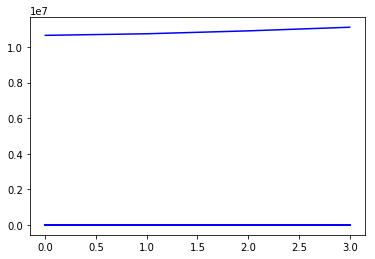

In [41]:
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')

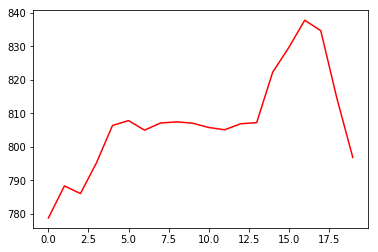

In [42]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')

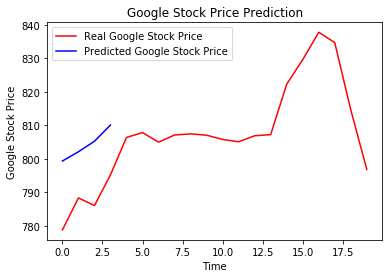

In [43]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(prediction_open , color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()